<a href="https://colab.research.google.com/github/jhermosillo/diplomado_CDD2019/blob/master/05%20Deep%20Learning/Notebooks/RNA_Keras_PIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size:50px;" align="left"> <img align="left" width="100%" src="../img/data_science_rec.jpg"/> <br> <br>Redes Neuronales con Keras y Tensorflow II</h1>

___

<style>
table, td, th {  
  border: 1px solid #ddd;
  text-align: left;
}
|  <img src="../img/data_science.jpg" width="300"/> |   <font color='midnightblue'>Diplomado en <br> Ciencia de Datos <br> con Python</font>|
|:-:|:-|


&#128214; <u>Referencias bibliográficas y sitios de interés</u>:
* Ian Goodfellow, Yoshua Bengio, and Aaron Courville. 2016. Deep Learning. The MIT Press.
* [Keras an API for Tensorflow](https://keras.io/getting_started/)
* [Tensorflow: end-to-end open source machine learning platform](https://www.tensorflow.org/)
* [Deep Learning with Keras and TensorFlow](https://www2.mpia-hd.mpg.de/homes/dgoulier/MLClasses/Course%20-%20Deep%20Learning%20with%20Keras%20and%20TensorFlow%20-%20Part%201.html)

# [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

* Descripción:<br>
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

* Contenido:<br>
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

* Acknowledgements:<br>
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

* Inspiration:<br>
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

## Para subir carpetas a Colab

In [ ]:
# !apt-get install subversion
# !svn checkout "https://github.com/jhermosillo/diplomado_CDD2019/trunk/05%20Deep%20Learning/Data/"

## Módulos de Cómputo Científico

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Módulos para ML y visualización

In [2]:
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import seaborn as sns

# 1. Pre-procesamiento de los datos

In [4]:
df = pd.read_csv("../Data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Estadísticas

In [ ]:
df.describe()

### Gráficos descriptivos

In [ ]:
sns.countplot(x="Outcome",data=df)

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
sns.barplot(x='Outcome',y='Glucose',data=df,hue="Outcome")
plt.subplot(3,3,2)
sns.barplot(x='Outcome',y='BloodPressure',data=df,hue="Outcome")
plt.subplot(3,3,3)
sns.barplot(x='Outcome',y='SkinThickness',data=df,hue="Outcome")
plt.subplot(3,3,4)
sns.barplot(x='Outcome',y='BMI',data=df,hue="Outcome")
plt.subplot(3,3,5)
sns.barplot(x='Outcome',y='DiabetesPedigreeFunction',data=df,hue="Outcome")
plt.subplot(3,3,6)
sns.barplot(x='Outcome',y='Age',data=df,hue="Outcome")

### catplot para la visualización de variables categóricas

In [ ]:
sns.catplot(x='Pregnancies',y='Insulin',data=df,hue='Outcome',kind='point')

In [ ]:
sns.catplot(x='Outcome',y='Glucose',data=df,kind='swarm')

In [ ]:
sns.lmplot(x='Insulin',y='DiabetesPedigreeFunction',data=df,hue="Outcome")

### Campos con ceros

In [ ]:
cols= df.loc[:, df.columns != 'Outcome'].columns.values.tolist()

def checa_ceros(df, cols):
    col_ceros=[]
    for col in cols:
        ceros=len(df.loc[df[col] == 0, col])
        print('La columna {} tiene {} 0-s'.format(col, ceros))
        if ceros >0:
            col_ceros.append(col)
    return col_ceros

col_ceros=checa_ceros(df, cols)
print(col_ceros)

In [ ]:
col_ceros=col_ceros[1:]
print(col_ceros)

# Separación de datos

In [7]:
y = df['Outcome']
X = df.drop('Outcome',axis=1)
print(y.head())
X.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


### Separación en Entrenamiento, Validación y Prueba

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


### Imputación de X_train con el promedio

In [ ]:
def imputa_ceros(data, col):
    noceros = data.loc[data[col] != 0, col].copy()
    prom = np.sum(noceros) / len(noceros)
    k = len(data.loc[data[col] == 0, col])   
    data.loc[data[col] == 0, col ] = prom
    print('Columna: {}, se rellenaron {} datos en cero con el valor: {}'.format(col, k, prom))
    
for col in col_ceros:
    imputa_ceros(X_train, col)

### Imputación de X_test

In [ ]:
for col in col_ceros:
    imputa_ceros(X_test, col)

### Obtenemos los numpy arrays para el entrenamiento

In [ ]:
X_train = X_train.values
y_train = y_train.values
X_test  = X_test.values
y_test  = y_test.values
print(X_train.shape)
print(y_train.shape)

___

# 2. Modelo

In [9]:
# Librerías para el diseño de modelos secuenciales
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf
# para evitar warnings...      
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

Using TensorFlow backend.


## &#9998; Modelo

In [12]:
from numpy.random import seed
seed(1)

# Arquitectura del modelo
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(1,  activation='sigmoid' ))

print(model.summary())

# Hiper-parámetros:
EPOCAS = 10
BATCH  = 16

# Optimizador
from keras.optimizers import SGD, RMSprop, adagrad

opt = RMSprop(learning_rate=0.01, decay=1e-6)
# Optimizadores: Ref. https://ruder.io/optimizing-gradient-descent/index.html#fn12
# - SGD: θ=θ−η⋅∇θJ(θ;x(i);y(i)).

# - adagrad: gt,i=∇θJ(θt,i). θt+1=θt−η/√G+ϵ⋅g. G∈Rd×d here is a diagonal matrix 
#   where each diagonal element i,i is the sum of the squares of the gradients 
#   w.r.t. θi up to time step t.

# - RMSprop: E[g^2](t)=0.9E[g^2](t−1)+0.1g^2 θt+1=θt−η√{E[g^2](t)+ϵ} g(t)
#   RMSprop divides the learning rate by an exponentially decaying average 
#   of squared gradients. Hinton suggests γ to be set to 0.9, while a good 
#   default value for the learning rate η is 0.001.

#Callback para monitorear el desempeño del modelo
from keras.callbacks import ModelCheckpoint

# checkpoint: guarda el mejor modelo
ckpt_model = 'modelo-pima.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model, 
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

#Compila el modelo
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print('Listo')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None
Listo


In [ ]:
def reset_weights(model):
    session = tf.compat.v1.keras.backend.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=session)
reset_weights(model)

## &#9998; Entrenamiento

['loss', 'accuracy']
154/154 [==============================] - 0s 13us/step

Test loss: 5.756
Test accuracy: 64.29


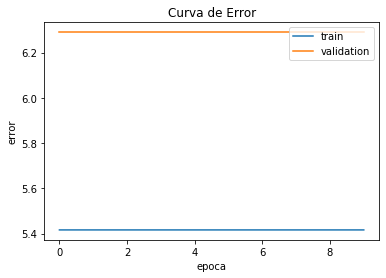

In [13]:
history = model.fit(X_train, y_train,
                    epochs=EPOCAS,
                    batch_size=BATCH,
                    validation_split=0.2,
                    callbacks=callbacks_list,
                    verbose=0)

print(model.metrics_names)
score = model.evaluate(X_test, y_test,verbose=1)
print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1]*100, 2))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Curva de Error')
plt.ylabel('error')
plt.xlabel('epoca')
plt.legend(['train', 'validation'], loc='upper right')

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Curva de Exactitud')
plt.ylabel('exactitud')
plt.xlabel('epoca')
plt.legend(['train', 'validation'], loc='lower right')